In [20]:
import pandas as pd

file1='./../data/survey_results_public.csv'
file2='./../data/survey_results_schema.csv'

df = pd.read_csv(file1, index_col='Respondent')
schema_df = pd.read_csv(file2, index_col='Column')

In [21]:
country_grp = df.groupby(['Country'])
country_language = country_grp['LanguageWorkedWith'].apply(lambda x: x.str.split(';'))
country_language.dropna(inplace=True)

country_language = country_language.reset_index()

country_language = country_language.sort_values(by='Country', ascending=True)
country_language

,Country,Respondent,LanguageWorkedWith
0,Afghanistan,6417,[Java]
22,Afghanistan,59560,"[C, C++, Go, HTML/CSS, Java, JavaScript, Pytho..."
23,Afghanistan,60569,"[C++, C#, HTML/CSS, Java, JavaScript, PHP, Pyt..."
24,Afghanistan,60946,"[HTML/CSS, JavaScript, PHP, SQL]"
25,Afghanistan,62168,"[Assembly, C, HTML/CSS, Java, JavaScript, PHP,..."
...,...,...,...
87544,Zimbabwe,22363,"[HTML/CSS, JavaScript, PHP]"
87545,Zimbabwe,22975,"[Elixir, Erlang, HTML/CSS, Java, JavaScript, P..."
87546,Zimbabwe,23162,"[HTML/CSS, Java, JavaScript, Kotlin, R, Scala]"
87548,Zimbabwe,30743,"[Bash/Shell/PowerShell, HTML/CSS, Java, JavaSc..."


In [22]:
from collections import Counter
language_counter = Counter()

people = {'Country': [],'languages': [],'popularity': []}

import pandas as pd
df = pd.DataFrame(people)
df

,Country,languages,popularity


In [17]:
filt_new = (country_language['Country'] =='India') | (country_language['Country'] =='Germany') | (country_language['Country'] =='United States')
country_language_filt = country_language[filt_new]
country_language_filt = country_language_filt.sort_values(by='Country', ascending=True)

Country = 'Germany'
language_counter = Counter()

for index, row in country_language_filt.iterrows():
    if Country  != row['Country']:
        print('Prev Country:', Country)
        print('Current Loop Country:', row['Country'])
        print(language_counter.most_common(15))
        Country = row['Country']
        language_counter = Counter()
        print()
    language_counter.update(row['LanguageWorkedWith'])

print(Country,language_counter.most_common(15))

Prev Country: Germany
Current Loop Country: India
[('JavaScript', 3577), ('HTML/CSS', 3446), ('SQL', 2920), ('Java', 2761), ('Python', 2451), ('Bash/Shell/PowerShell', 2437), ('PHP', 1603), ('C#', 1600), ('C++', 1533), ('TypeScript', 1299), ('C', 1229), ('Other(s):', 680), ('Go', 539), ('Kotlin', 493), ('Ruby', 410)]

Prev Country: India
Current Loop Country: United States
[('JavaScript', 5697), ('HTML/CSS', 5514), ('Java', 4447), ('SQL', 4429), ('Python', 3105), ('C', 2884), ('C++', 2588), ('PHP', 2565), ('C#', 1699), ('Bash/Shell/PowerShell', 1658), ('TypeScript', 1514), ('Swift', 569), ('Kotlin', 565), ('Assembly', 553), ('Other(s):', 550)]

United States [('JavaScript', 14672), ('HTML/CSS', 13488), ('SQL', 11829), ('Python', 10083), ('Bash/Shell/PowerShell', 9662), ('Java', 7608), ('C#', 6781), ('TypeScript', 4568), ('C++', 4554), ('PHP', 3970), ('C', 3684), ('Ruby', 2617), ('Go', 2343), ('Other(s):', 2135), ('R', 1606)]


In [23]:
Country = 'Afghanistan'

for index, row in country_language.iterrows():
    if Country  != row['Country']:
        languages, popularity = zip(*language_counter.most_common(15))
        Country = [Country]*len(list(languages))
        dict = {'Country': Country, 'languages': list(languages), 'popularity': list(popularity)} 
        df2 = pd.DataFrame(dict)
        df = df._append(df2, ignore_index=True, sort=False)
        Country = row['Country']
        language_counter = Counter()
    language_counter.update(row['LanguageWorkedWith'])

languages, popularity = zip(*language_counter.most_common(15))
Country = [Country]*len(list(languages))
dict = {'Country': Country, 'languages': list(languages), 'popularity': list(popularity)} 
df2 = pd.DataFrame(dict)
df = df._append(df2, ignore_index=True, sort=False)

df.set_index('Country', inplace=True)
df.to_csv('./../data/modified.csv')

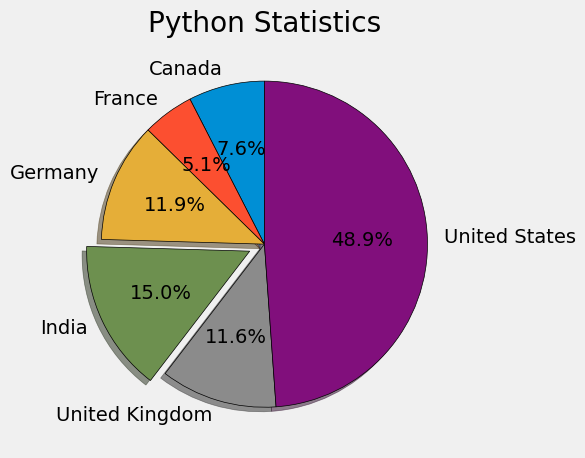

In [62]:
from matplotlib import pyplot as plt

python_df = df[ (df['languages'] == 'Python') & (df['popularity'] > 1000 )]
python_df.reset_index(inplace=True)

plt.style.use("fivethirtyeight")


slices = python_df['popularity']
labels = python_df['Country']
explode = [0, 0, 0, 0.1, 0, 0]

plt.pie(slices, labels=labels,explode=explode,shadow=True,startangle=90, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'})

plt.title("Python Statistics")
plt.tight_layout()
plt.show()